Klíčové pojmy:

* Zákon velkých čísel
* Centrální limitní věta
* Inference
* Bodový odhad
* Interval spolehlivosti


### Zákon velkých čísel

My jsme zákon velkých čísel používali intuitivně užv minulém semestru. Zákon velkých čísel říká, že průměr velkého počtu pozorování (výsledků pokusů) se bude limitně přibližovat očekávané hodnotě, neboli $\overline{X_n} = \frac{1}{n}\sum_{i=1}^{n} X_i$ $\overline{X_n} \to \mu$, pokud $n \to \infty$. Pojďme si to ukázat na příkladu hodu kostkou. Očekávaná hodnota hodu kostkou je $E(X) = \frac{(a+b)}{2}$. Předpokládáme přitom, že hodnoty náhodné proměné $X$ jsou jsou nezávislé a stejně rozdělené (independent, identically distributed $X_{iid}$).

Očekávaná hodnota je: 3.5
Průměr 10 hodů je: 3.8
Průměr 1000 hodů je: 3.458516974396522


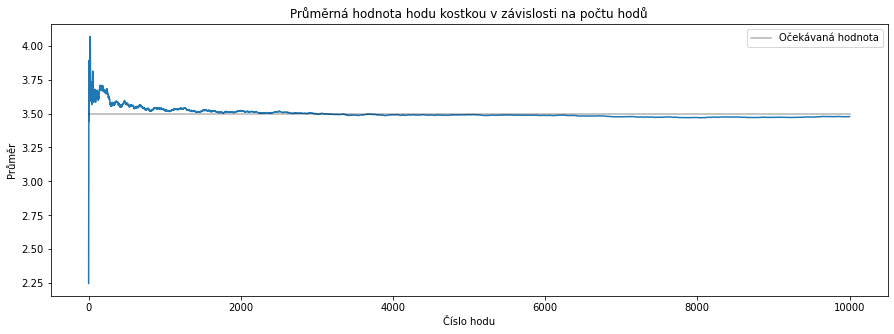

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
np.random.seed(42)

a = 1
b = 6
ocekavana_hodnota = (a+b)/2
print(f"Očekávaná hodnota je: {ocekavana_hodnota}")

# nejdrive vyzkousime 10 hodu
kostka= np.arange(1,6+1)
n = 10
hody_n10 = np.random.choice(kostka,size=n,replace=True)
print(f"Průměr {n} hodů je: {hody_n10.mean()}")

# ted 1000 hodů
n = 1000
hody_n1000 = stats.uniform.rvs(size=n, loc=a, scale=b-a)
print(f"Průměr {n} hodů je: {hody_n1000.mean()}")

n = int(1e4)
hody = stats.uniform.rvs(size=n, loc=a, scale=b-a)
prumer = np.zeros(n)
for i in range(n):
    prumer[i] = hody[:(i+1)].mean()

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(prumer[:(n+1)])
ax.set_xlabel("Číslo hodu")
ax.set_ylabel("Průměr")
ax.set_title("Průměrná hodnota hodu kostkou v závislosti na počtu hodů")
ax.plot([0,n],[ocekavana_hodnota, ocekavana_hodnota], color = "black", alpha = 0.3, label = "Očekávaná hodnota")
ax.legend()
plt.show()

Stejně tak platí, že průměr, proměnné pocházejícího z binomického rozložení se bude blížit očekávané hodnotě rozložení, z kterého pochází. Jako příklad si ukážeme data o narozených dětech. Předpokládejme, že měsíc narození dětí je uniformně rozložen, tedy, že existuje stejná pravděpodobnost, že se děti rodí v lednu jako v červenci. Tedy pravděpodobnost toho, že se dítě narodí v nějaký měsíc je 1/12. Simulujme tedy proces, v kterém se dítě buď narodí v dubnu (1) nebo nenarodí (0). 

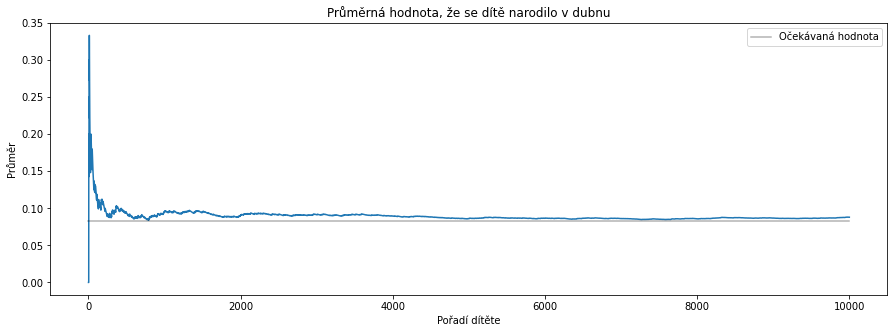

In [2]:
n=int(1e4)
ocekavana_hodnota= 1/12
deti = stats.binom.rvs(p=1/12, n = 1, size=n)

prumer = np.zeros(n)
for i in range(n):
    prumer[i] = deti[:(i+1)].mean()

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(prumer[:(n+1)])
ax.set_xlabel("Pořadí dítěte")
ax.set_ylabel("Průměr")
ax.set_title("Průměrná hodnota, že se dítě narodilo v dubnu")
ax.plot([0,n],[ocekavana_hodnota, ocekavana_hodnota], color = "black", alpha = 0.3, label = "Očekávaná hodnota")
ax.legend()
plt.show()

Zákon velkých čísel má pro statistiku velké implikace. Pokud totiž máme dostatečně velké množství hodnot náhodné proměnné, bude se její průměr blížit průměru rozložení, z kterého pochází (za dodržení předpokladů, tedy $X_{iid}$). Jak jsme ale viděli ze simulací nahoře, to jak se bude průměr proměnné blížit očekávané hodnoty rozložení, záleží na tom, kolik hodnot naše proměnná obsahuje. Průměr kardinální proměnné je také náhodná proměnná, která bude proměnnou spojitou. Označme ji třeba $\overline{X}$. I tato náhodná proměnná bude mít svoje rozložení. Průměrem tohoto rozložení bude průměr proměnné $\overline{X}$ (označme ho třeba $\mu$) a rozptyl bude $\frac{\sigma^2}{n}$, kde $\sigma^2$ značí rozptyl původního rozložení a $n$ počet hodnot proměnné $\overline{X}$. Tedy $\overline{X} \sim N(\mu, \frac{\sigma}{\sqrt{n}})$. Ukažme si jak centrální limitní věta funguje na příkladu proměnné pohlaví. Ze sčítání lidu víme, že v ČR je zhruba 51% žen a 49% mužů. Při sčítání lidů se ptáme úplně všech občanů ČR, známe tedy hodnoty celého rozložení proměnné. Většinou se ale v sociologických šetřeních všech občanů ptát nemůžeme a používáme pouze výběr z této populace. My si teď tuto situaci nasimulujeme a ukážeme si, že průměry jednotlivých výběrů z této populace (z tohoto rozložení) budou mít normální rozložení $\overline{X} \sim N(\mu, \frac{\sigma}{\sqrt{n}})$. $\frac{\sigma}{\sqrt{n}}$ se nazývá standardní chyba. 

In [3]:
p = 0.51
rozptyl = p*(1-p)
N = 10300000
populace = stats.binom.rvs(n=1,size=N,p=p) 

# uděláme 1000 náhodných výběrů o velikosti 100
k = 1000
n = 100
prumery = np.zeros(k)

for i in range(k):
    #vyber = np.random.choice(populace,size=n,replace=False)
    vyber = np.random.choice([1,0],size=n,p=[0.51,0.49])
    prumery[i] = vyber.mean()

[]

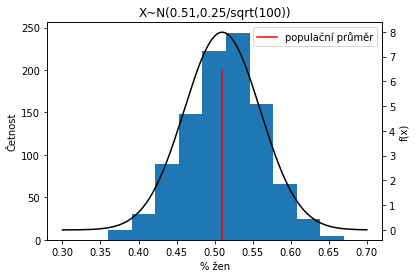

In [4]:
x = np.linspace(0.3, 0.7, num=1000)
pdf = stats.norm.pdf(x,loc=0.51,scale=np.sqrt(rozptyl/n))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(prumery)
ax1.plot([0.51,0.51],[0,200],color="red",label="populační průměr")
ax1.set_xlabel("% žen")
ax1.set_ylabel("Četnost")
ax2.plot(x,pdf, color = "black")
ax2.set_ylabel("f(x)")
ax1.set_title("X~N(0.51,0.25/sqrt(100))")
ax1.legend()
plt.plot()

Pojďme si ukázat, že průměry budou mít normální rozdělení nezávisle na tom, z kterého rozložení pocházejí. Ve skutečnosti, většinou neznáme populační rozptyl $\sigma$ a tak ho nahrazujeme odhadem, který uděláme z našeho výběru. Tento odhad označujeme jako $S^2$ a vypočátáme ho jako $S^2 = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{(n-1)}$.

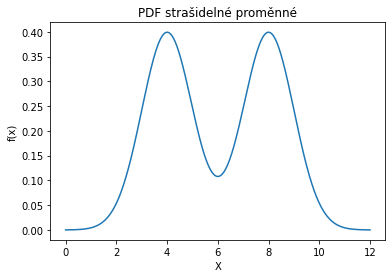

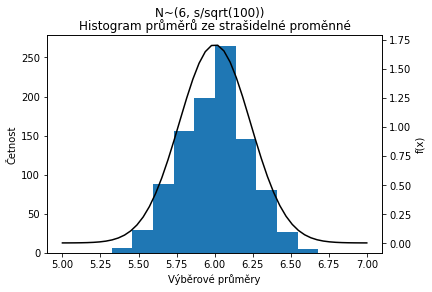

In [5]:
x = np.linspace(0,12,num=1000)
pdf = stats.norm.pdf(x,loc=4,scale=1) + stats.norm.pdf(x,loc=8,scale=1)
n = 1000
p = pdf / pdf.sum()
X_ = np.random.choice(x, size=int(1e6), replace=True, p=p)

plt.plot(x,pdf)
plt.ylabel("f(x)")
plt.xlabel("X")
plt.title("PDF strašidelné proměnné")
plt.show()

# uděláme 1000 náhodných výběrů o velikosti 100
k = 1000
n = 100
prumery = np.zeros(k)

for i in range(k):
    #vyber = np.random.choice(populace,size=n,replace=False)
    vyber = np.random.choice(x,size=n,p=p)
    prumery[i] = vyber.mean()

s = vyber.std()/np.sqrt(n)
x = np.linspace(5,7)
pdf = stats.norm.pdf(x, loc = X_.mean(), scale = s)
fig, ax1 = plt.subplots()
ax1.hist(prumery)
ax1.set_xlabel("Výběrové průměry")
ax1.set_ylabel("Četnost")
ax1.set_title("Histogram průměrů ze strašidelné proměnné")
ax2 = ax1.twinx()
ax2.plot(x,pdf, color = "black")
ax2.set_ylabel("f(x)")
plt.suptitle("N~(6, s/sqrt(100))")
plt.show()

To, co jsme si právě ukázali má ohromné důsledky pro schopnost statistiky podávát informace o původním rozložení, i když máme pouze jeho část. Protože dokážeme odhadnout, v jakém rozmezí se zhruba bude výběrový průměr pohybovat, můžeme tak udělat odhad o tom, kde se bude nacházet průměr celé populace. Takovému procesu se říká statistická inference a budeme ji využívat v celém zbytku semestru k tomu, abychom usoudili o populačním parametru. Ve zbytku cvičení se zaměříme na jednu implikaci, interval spolehlivosti. Interval spolehlivosti vyjadřuje interval možných hodnot parametru, který můžeme z výběrových dat očekávat. Tento interval má hladinu spolehlivosti, která určuje šířku intervalu a tedy hodnot. Interval spolehlivosti znáte například z předvolebních průzkumů, kdy je vedle % podpory strany uvedeno např. +/- 3%. Interval spolehlivosti se vypočítá jako $IS_{1-\alpha} = \overline{x} +/- z \frac{s}{\sqrt{n}}$, kde $z$ je z skor, tedy standardizovaná hodnota s průměrem 0 a směrodatnou odchylkou 1. Pojďme se vrátit k příkladu proměnné pohlaví, kde známe populační průměr a můžeme si ukázat, jak interval spolehlivosti funguje.

In [6]:
n = 100
vyber = np.random.choice(populace, size=n, replace=False)
std_error = vyber.std() / np.sqrt(n)
alpha = 0.11
z = stats.norm.ppf(1-alpha/2)

ci = [vyber.mean() - z * std_error, vyber.mean() + z * std_error]
print(f"Interval spolehlivosti na konfidenční hladine {1-alpha} je {ci}")

Interval spolehlivosti na konfidenční hladine 0.89 je [0.5011198179690163, 0.6588801820309836]


V praxi tato hodnota znamena, že pokud bychom dělali výběry dokola a dokola, tak by další intervaly spolehlivosti obsahovaly skutečnou hodnotu v $1-\alpha$ případů. Pojďme si teď tuto situaci ukázat. 

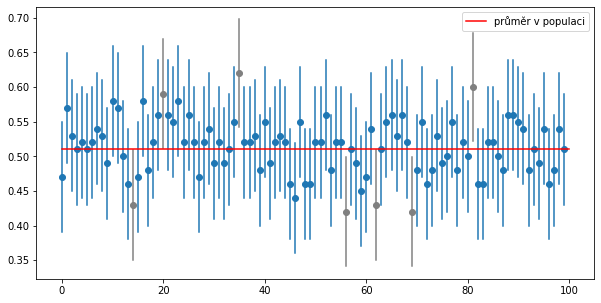

In [7]:
k = 100
alpha = 0.11
z = stats.norm.ppf(1-alpha/2)

fig, ax = plt.subplots(figsize=(10,5))
for i in range(k):
    vyber = np.random.choice([1,0], size=n, replace=True, p=[0.51,0.49])
    prumer = vyber.mean()
    std_error = vyber.std() / np.sqrt(n)
    ci = [prumer-z*std_error, prumer+z*std_error]

    if (ci[0] >= 0.51) | (ci[1] <= 0.51):
        ax.scatter(i, prumer, color="grey")
        ax.plot([i,i], ci, color = "grey")
    else:
        ax.scatter(i, prumer, color="#1f77b4")
        ax.plot([i,i], ci, color = "#1f77b4")

ax.plot([0,n], [0.51, 0.51], color = "red", label="průměr v populaci")
ax.legend()    
plt.show()


Zkuste si nyni hrat s konfidenční hladinou intervalu spolehlivosti. 